In [2]:
from fbprophet import Prophet
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import geopandas as gp
import folium
from shapely.geometry import Point, Polygon

In [3]:
uber_df_geo = pd.read_csv('cleaned_data_all.csv')
uber_df_geo = uber_df_geo[uber_df_geo.columns[1:]]

In [4]:
uber_df_geo.head(5)

,Date/Time,Lat,Lon,Base,month,date,hour,minute,Point,grid
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,2014-04-01 00:00:00,0,11,POINT (-73.95489999999999 40.769),10021.0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,2014-04-01 00:00:00,0,17,POINT (-74.03449999999999 40.7267),NaN
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,2014-04-01 00:00:00,0,21,POINT (-73.9873 40.7316),10003.0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,2014-04-01 00:00:00,0,28,POINT (-73.9776 40.7588),NaN
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,2014-04-01 00:00:00,0,33,POINT (-73.9722 40.7594),10022.0


In [5]:
grid_ranks = uber_df_geo.groupby('grid').grid.count().sort_values(ascending = False)

In [6]:
uber_df_geo['date'] = pd.to_datetime(uber_df_geo['date'])

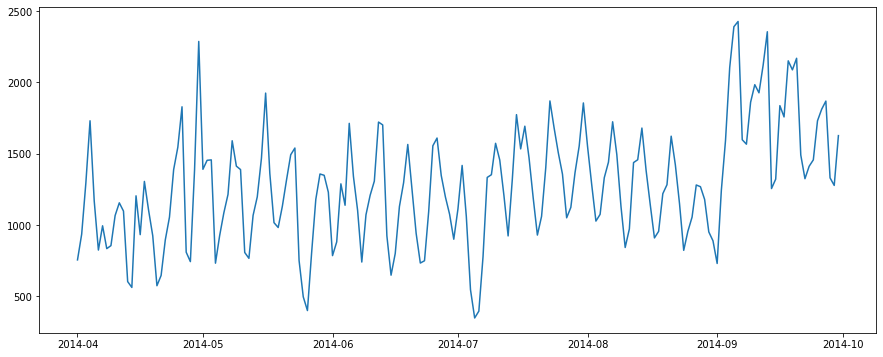

In [7]:
uber_df_geo_grid = uber_df_geo[uber_df_geo.grid == grid_ranks.index[0]]
plt.figure(figsize = (15,6))
plt.plot(uber_df_geo_grid.groupby('date').grid.count())

In [8]:
ts= uber_df_geo_grid.groupby('date').grid.count()
ts_train = pd.DataFrame(ts[:-7])
ts_train['ds'] = ts_train.index
ts_train['y'] = ts_train['grid']

In [9]:
grid_ranks.index[0]

10011.0

In [10]:
m = Prophet()
m.fit(ts_train)
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/frank/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



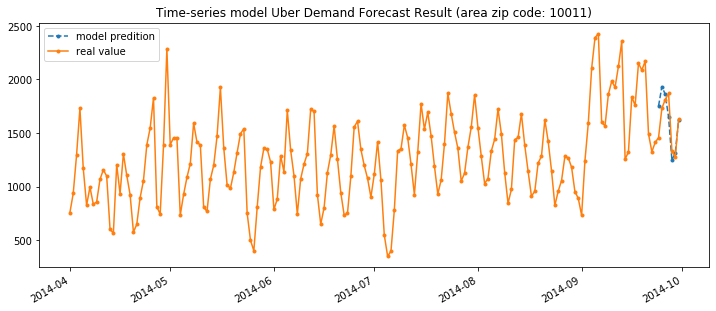

In [15]:
fig = plt.figure(figsize = (12,5))
plt.plot( forecast['ds'][-7:], forecast['yhat'][-7:],label ='model predition',linestyle='--',marker = '.')
plt.plot(ts,label ='real value',marker = '.')
fig.autofmt_xdate()
plt.title('Time-series model Uber Demand Forecast Result (area zip code: 10011)')
plt.legend()
plt.show()

In [12]:
ts[-7:]

date
2014-09-24    1457
2014-09-25    1731
2014-09-26    1812
2014-09-27    1869
2014-09-28    1331
2014-09-29    1278
2014-09-30    1627
Name: grid, dtype: int64

In [13]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(forecast['yhat'][-7:].values, ts[-7:].values)

127.7271437783402

In [14]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(forecast['yhat'][-7:].values, ts[-7:].values)

7.6061165160525315